In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
med_info = pd.read_csv("insurance.csv")

med_info.loc[med_info['sex'] == 'female', 'sex'] = 1
med_info.loc[med_info['sex'] == 'male', 'sex'] = 0
med_info.loc[med_info['smoker'] == 'yes', 'smoker'] = 1
med_info.loc[med_info['smoker'] == 'no', 'smoker'] = 0
med_info.loc[med_info['region'] == 'northeast', 'region'] = 0
med_info.loc[med_info['region'] == 'southeast', 'region'] = 1
med_info.loc[med_info['region'] == 'southwest', 'region'] = 2
med_info.loc[med_info['region'] == 'northwest', 'region'] = 3

data = med_info
data.iloc[:, :-1] = (med_info.iloc[:, :-1] - med_info.iloc[:, :-1].mean()) / med_info.iloc[:, :-1].std()

data.insert(0, 'ones', 1)
train_x = data.iloc[:936, :-1].to_numpy()
train_y = np.reshape(med_info.iloc[:936, -1].to_numpy(), (936, 1))
test_x = data.iloc[936:, :-1].to_numpy()
test_y = np.reshape(med_info.iloc[936:, -1].to_numpy(), (402, 1))
m = train_x.shape[0]
# print(train_y)

In [15]:
alpha = 0.1
iterations = 400
theta = np.matrix(np.zeros([train_x.shape[1]])).astype(float)
def compute_cost(x, y, theta):
    cost = 1 / (2 * m) * np.sum(np.square(x * theta.T - y))
    return cost

theta [[13102.09479785  3654.22421186   209.6605135   1964.41578505
    511.28608758  9713.53268955  -136.39330248]]
17203569.994165365


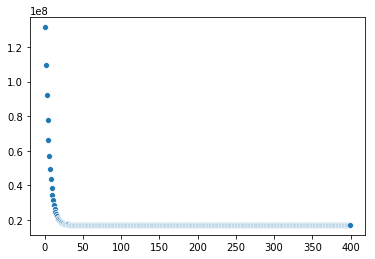

In [16]:
J_history = np.array([0, 0])
for iters in range(1, iterations):
    hypothesis = train_x * theta.T
    theta = theta - alpha * 1/m * (sum(np.multiply(train_x, (hypothesis - train_y))))
    J_history = np.vstack((J_history, np.array([iters, compute_cost(train_x, train_y, theta)])))
print('theta', theta)
print(compute_cost(train_x, train_y, theta))
J_history = np.delete(J_history, 0, axis=0)
sns.scatterplot(x=J_history[:, 0], y=J_history[:, 1])

Text(0, 0.5, 'Insurance Cost')

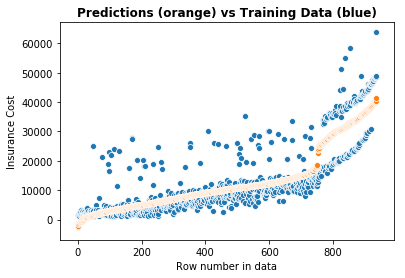

In [78]:
# see how model fits 
guess1 = np.zeros(2)
reality1 = np.zeros(2)
for index in range(train_x.shape[0]): # range is number of rows in training set
    b = data.iloc[index]
    price = np.reshape(data.iloc[index, :-1].to_numpy(), (1,theta.shape[1])) * theta.T
    guess1 = np.vstack([guess1, np.array([index, price], dtype=object)])
    reality1 = np.vstack([reality1, np.array([index, b['charges']], dtype=object)])
graph1 = np.concatenate((guess1, reality1), axis=1)
graph1 = np.delete(graph1, 0, axis=1)
graph1 = np.delete(graph1, 1, axis=1)
graph1 = np.delete(graph1, 0, axis=0)
graph1 = graph1[np.lexsort(np.fliplr(graph1).T)]
index1 = np.matrix(np.arange(train_x.shape[0])).T
graph1 = np.concatenate((index1, graph1), axis=1)

row1 = np.ravel(graph1[:, 0])
guess1 = np.ravel(graph1[:, 1])
reality1 = np.ravel(graph1[:, 2])

g1 = sns.scatterplot(x=row1, y=reality1)
sns.scatterplot(x=row1, y=guess1)

g1.set_title("Predictions (orange) vs Training Data (blue)", weight="bold")
g1.set_xlabel("Row number in data")
g1.set_ylabel("Insurance Cost")

Text(0, 0.5, 'Insurance Cost')

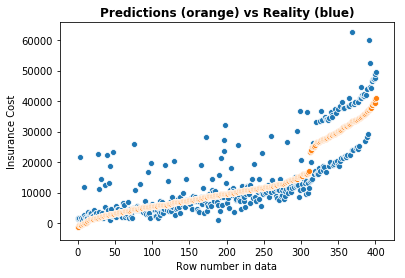

In [88]:
# guesses vs reality
guess = np.zeros(2)
reality = np.zeros(2)
for index in range(test_x.shape[0]):
    a = data.iloc[train_x.shape[0] + index]
    price = np.reshape(data.iloc[train_x.shape[0] + index, :-1].to_numpy(), (1,theta.shape[1])) * theta.T
    guess = np.vstack([guess, np.array([index, price], dtype=object)])
    reality = np.vstack([reality, np.array([index, a['charges']], dtype=object)])
graph = np.concatenate((guess, reality), axis=1)
graph = np.delete(graph, 0, axis=1)
graph = np.delete(graph, 1, axis=1)
graph = np.delete(graph, 0, axis=0)
graph = graph[np.lexsort(np.fliplr(graph).T)]
index = np.matrix(np.arange(test_x.shape[0])).T
graph = np.concatenate((index, graph), axis=1)
row = np.ravel(graph[:, 0])
guess = np.ravel(graph[:, 1])
reality = np.ravel(graph[:, 2])

g = sns.scatterplot(x=row, y=reality)
sns.scatterplot(x=row, y=guess)

g.set_title("Predictions (orange) vs Reality (blue)", weight="bold")
g.set_xlabel("Row number in data")
g.set_ylabel("Insurance Cost")